# Random Numbers Generators
### Kirill Zakharov

### Middle squares

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [29]:
def gen1(r, s, n):
    r0 = r
    r1 = 0
    str_r1 = ''
    
    rand_array = [r0/100]
    for i in range(s):
        r1 = r0**2
        if len(str(r1)) < 2*n:
            r0 = int(str(r1).zfill(2*n)[n//2:-n//2])
        else:
            r0 = int(str(r1)[n//2:-n//2])
            
        rand_array.append(r0/100)
        
    return rand_array    

In [30]:
res1 = gen1(1615, 1000, 4)
# res1

#### Histogram

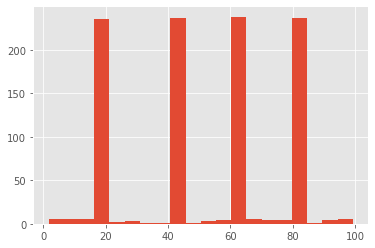

In [31]:
plt.hist(np.array(res1), bins=20)
plt.show()

### Linear Congruent method

In [32]:
def gen_LG(r, s, k, b, m):
    r0 = r
    
    rand_array = [r0/m]
    for i in range(s):
        r0 = (k*r0 + b)%m
            
        rand_array.append(r0/m)
        
    return rand_array

### [0;1]

In [33]:
res2 = gen_LG(16, 10000, 8121, 28411, 134456)
res2[:10]

[0.00011899803653239721,
 0.17768638067471887,
 0.20240078538704112,
 0.9080814541560064,
 0.7407925269233058,
 0.18741447016124235,
 0.20421550544416017,
 0.6454230380198727,
 0.6917950853810912,
 0.2791917058368537]

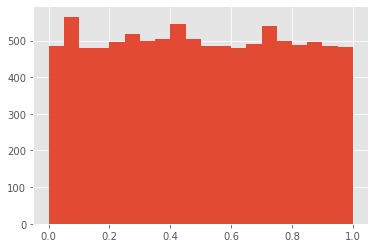

In [34]:
plt.hist(np.array(res2), bins=20)
plt.show()

### [a;c]

In [35]:
def gen_LG_ac(r, s, k, b, m, a, c):
    r0 = r
    
    rand_array = []
    for i in range(s):
        r0 = (k*r0 + b)%m
            
        rand_array.append(r0/m *(c-a) + a)
        
    return rand_array

In [36]:
res3 = gen_LG_ac(26, 10000, 8121, 28411, 134456, 2, 6)
res3[:10]

[5.12670315939787,
 2.8015707740822275,
 4.401469625751175,
 5.1800440292735175,
 3.9827750342119357,
 4.961266139108705,
 3.287529005771405,
 2.8682691735586365,
 2.0591717736657347,
 3.3791872434104837]

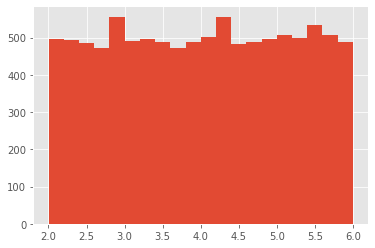

In [37]:
plt.hist(np.array(res3), bins=20)
plt.show()

### Exponential distribution

In [38]:
def gen_Exp(lmd, s):
    
    rand_array = []
    
    for i in range(s):
        rand_array.append(- np.log(np.random.random())/lmd)
        
    return rand_array

In [39]:
lmd = 2
res4 = gen_Exp(lmd, 10000)
res4[:10]

[0.505773592498741,
 0.48454191268821634,
 0.2713358777285977,
 0.05180349299321727,
 0.19173005092452652,
 0.389111144532803,
 1.0028012986003005,
 0.1899870273060071,
 1.7984519021450465,
 0.3797044528869438]

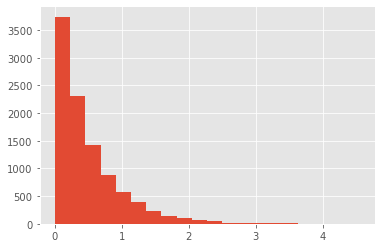

In [40]:
plt.hist(res4, bins=20)
plt.show()

In [41]:
res4 = np.array(res4)
print(f'E ~ {res4.mean()}, E = {1/lmd}')

E ~ 0.49646492694012634, E = 0.5


In [55]:
print(f'D ~ {res4.var()}, D = {1/lmd**2}')

D ~ 0.2525267801283113, D = 0.25


### Triangular Distribution

In [43]:
def gen_Tr(a, c, b, s):
    
    rand_array = []
    
    for i in range(s):
        rand_array.append(np.sqrt(np.random.random() * (b-a)*(c-a)) + a)
    for i in range(s):    
        rand_array.append(b - np.sqrt((1-np.random.random()) * (b-a)*(b-c)))
        
    return rand_array

In [44]:
a = 1
b = 50
c = 110

res5 = gen_Tr(a, b, c, 10000)
res5[:10]

[62.1407816357547,
 30.55576756705445,
 34.20573937761011,
 71.05842822420134,
 32.233060067652616,
 18.120734254136345,
 57.393740296702404,
 21.94929769903111,
 61.09013810589936,
 55.02245714981945]

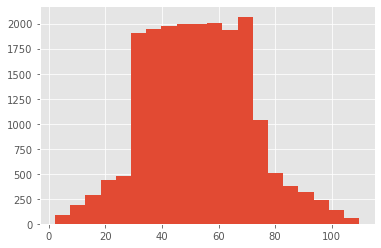

In [45]:
plt.hist(res5, bins=20)
plt.show()

In [46]:
res5 = np.array(res5)
print(f'E ~ {res5.mean()}, E = {(a+b+c)/3}')

E ~ 52.74779434618184, E = 53.666666666666664


In [56]:
print(f'D ~ {res5.var()}, D = {(a**2 + b**2 + c**2 - a*b - a*c - b*c)/18}')

D ~ 343.5907210973054, D = 496.72222222222223


### Normal Distribution

In [48]:
#Box-Mullers' transform

def gen_ND(s):
    rand_array = []
    for i in range(s):
        z1 = np.cos(2*np.pi * np.random.random()) * np.sqrt(-2*np.log(np.random.random()))
        z2 = np.cos(2*np.pi * np.random.random()) * np.sqrt(-2*np.log(np.random.random()))
        
        rand_array.append(z1)
        rand_array.append(z2)
        
    return rand_array

In [49]:
res6 = gen_ND(100000)
res6[:10]

[-1.0107118969556232,
 0.26141711947524343,
 -0.19985699962942474,
 0.09404024872979905,
 0.9099150376714423,
 -1.1487412115622675,
 2.5553822110696602,
 0.5274646159109998,
 0.205237581330894,
 -0.7228767865621365]

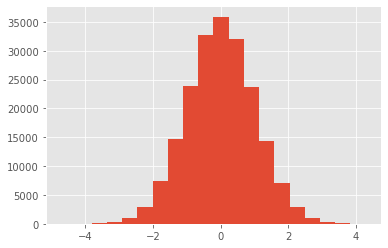

In [52]:
plt.hist(res6, bins=20)
plt.show()

In [59]:
print(f'E = {np.array(res6).mean()}\nD = {np.array(res6).var()}')

E = 0.0024038668767711125
D = 0.997634927671805


In [60]:
#By Central Limit Theorem

def gen_ND_CLT(s, n):
    rand_array = []
    
    for i in range(s):
        rand_array.append(np.sqrt(12/n)*(np.sum(np.random.uniform(0, 1, n))-n/2))
    
    return rand_array

In [63]:
res7 = gen_ND_CLT(100000, 10)
res7[:10]

[-0.26512728744164266,
 -0.42648856208819824,
 -0.008929304330911138,
 -0.8073750994936354,
 1.2821277986787103,
 -0.36485124853041523,
 0.14613714933888514,
 -0.779398433526456,
 -0.14353303039184548,
 -0.4839492368238783]

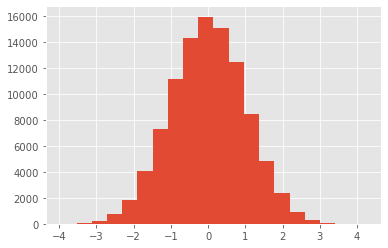

In [65]:
plt.hist(res7, bins=20)
plt.show()

In [66]:
print(f'E = {np.array(res7).mean()}\nD = {np.array(res7).var()}')

E = 0.0016735981512426736
D = 0.9956262792156192
